In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cost_function(theta: np.ndarray, X: np.ndarray, y: np.ndarray):
    # Initialize some useful values
    m = y.size

    # You need to return the following values correctly
    J = 0
    grad = np.zeros(theta.shape)

    # ===================== Your Code Here =====================
    # Instructions : Compute the cost of a particular choice of theta
    #                You should set cost and grad correctly.
    #
    hypothesis = 1 / (1 + np.exp(-1 * np.dot(X, theta)))
    J = -1 * np.sum(y * np.log(hypothesis) + (1 - y) * np.log(1 - hypothesis)) / m
    grad = np.dot(X.T, (hypothesis - y)) / m
    # ===========================================================
    return J, grad

In [33]:
def cost_function_reg(theta: np.ndarray, X: np.ndarray, y: np.ndarray, lmd):
    # Initialize some useful values
    m = y.size

    # You need to return the following values correctly
    J = 0
    grad = np.zeros(theta.shape)

    # ===================== Your Code Here =====================
    # Instructions : Compute the cost of a particular choice of theta
    #                You should set cost and grad correctly.
    #
    reg_theta = theta[1:]
    hypothesis = 1 / (1 + np.exp(-1 * np.dot(X, theta)))
    J = -1 * np.sum(y * np.log(hypothesis) + (1 - y) * np.log(1 - hypothesis)) / m + np.dot(theta.T, theta) * lmd / (2 * m)
    normal_grad = np.dot(X.T, (hypothesis - y)) / m
    grad[0] = normal_grad[0]
    grad[1:] = normal_grad[1:] + reg_theta * lmd / m
    # ===========================================================
    return J, grad

In [27]:
def map_feature(X1: np.ndarray, X2: np.ndarray):
    degree = 6

    X1 = X1.reshape((X1.size, 1))
    X2 = X2.reshape((X2.size, 1))
    out = np.ones(X1[:, 0].shape)
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out = np.c_[out, X1 ** (i - j) * X2 ** (j)]
    return out

In [5]:
def plot_data(X: np.ndarray, y: np.ndarray):
    pos = np.where(y == 1)[0]
    neg = np.where(y == 0)[0]

    plt.scatter(X[pos, 0], X[pos, 1], marker="+", c='b')
    plt.scatter(X[neg, 0], X[neg, 1], marker="o", c='y')

In [65]:
def plot_decision_boundary(theta: np.ndarray, X: np.ndarray, y: np.ndarray):
    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
        # Calculate the decision boundary line
        plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.axis([30, 100, 30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i in range(0, u.size):
            for j in range(0, v.size):
                z[i][j] = np.dot(map_feature(u[i], v[j]), theta)
        
        z = z.T
        cs = plt.contour(u, v, z, levels=[0], colors='r', label='Decision Boundary')
        plt.legend([cs.collections[0]], ['Decision Boundary'])

In [7]:
def predict(theta, X):
    m = X.shape[0]

    # You need to return the following variables correctly
    p = np.zeros(m)

    # ===================== Your Code Here =====================
    # Instructions : Complete the following code to make predictions using
    #                your learned logistic regression parameters.
    #                You should set p to a 1D-array of 0's and 1's
    #
    p = 1 / (1 + np.exp(-1 * np.dot(X, theta)))
    pos = np.where(p >= 0.5)
    neg = np.where(p < 0.5)

    p[pos] = 1
    p[neg] = 0
    # ===========================================================

    return p

# ex2

In [8]:
# Load Data
# The first two columns contains the exam scores and the third column contains the label.
data = np.loadtxt('/content/drive/MyDrive/Coursera_ML/Exer_2/ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

## Part 1: Plotting

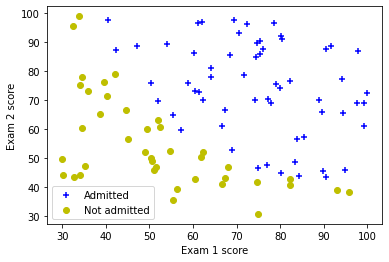

In [9]:
plot_data(X, y)

# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# Specified in plot order
plt.legend(['Admitted', 'Not admitted'])

## Part 2: Compute Cost and Gradient

In [10]:
# Setup the data array appropriately, and add ones for the intercept term
m, n = X.shape

In [11]:
# Add intercept term
X = np.c_[np.ones(m), X]

In [12]:
# Initialize fitting parameters
initial_theta = np.zeros(n + 1)

In [13]:
# Compute and display initial cost and gradient
cost, grad = cost_function(initial_theta, X, y)

In [14]:
print('Cost at initial theta (zeros): {:0.3f}'.format(cost))
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print('{}'.format(grad))
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [15]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = cost_function(test_theta, X, y)

In [16]:
print('Cost at test theta (zeros): {}'.format(cost))
print('Expected cost (approx): 0.218')
print('Gradient at test theta (zeros):')
print('{}'.format(grad))
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

Cost at test theta (zeros): 0.21833019382659774
Expected cost (approx): 0.218
Gradient at test theta (zeros):
[0.04290299 2.56623412 2.64679737]
Expected gradients (approx):
 0.043
 2.566
 2.647



## Part 3: Optimizing using fmin_bfgs

In [17]:
import scipy.optimize as opt

In [18]:
def cost_func(t):
    return cost_function(t, X, y)[0]

def grad_func(t):
    return cost_function(t, X, y)[1]

In [19]:
theta, cost, *unused = opt.fmin_bfgs(f=cost_func, fprime=grad_func, x0=initial_theta, maxiter=400, full_output=True, disp=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


In [20]:
print('Cost at theta found by fmin: {:0.4f}'.format(cost))
print('Expected cost (approx): 0.203')
print('theta: \n{}'.format(theta))
print('Expected Theta (approx): \n-25.161\n0.206\n0.201')

Cost at theta found by fmin: 0.2035
Expected cost (approx): 0.203
theta: 
[-25.16133284   0.2062317    0.2014716 ]
Expected Theta (approx): 
-25.161
0.206
0.201


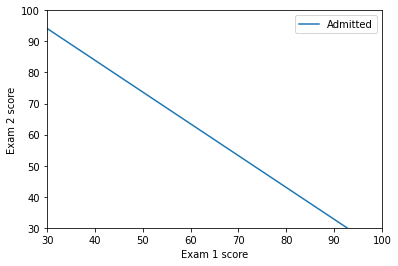

In [21]:
# Plot boundary
plot_decision_boundary(theta, X, y)

# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

plt.legend(['Admitted', 'Not admitted'])

## Part 4: Predict and Accuracies

In [22]:
# Predict probability for a student with score 45 on exam 1 and score 85 on exam 2
prob = 1 / (1 + np.exp(-1 * np.dot(np.array([1, 45, 85]), theta)))
print('For a student with scores 45 and 85, we predict an admission probability of {:0.4f}'.format(prob))
print('Expected value : 0.775 +/- 0.002')

For a student with scores 45 and 85, we predict an admission probability of 0.7763
Expected value : 0.775 +/- 0.002


In [23]:
# Compute accuracy on our training set
p = predict(theta, X)

print('Train accuracy: {}'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.0')

Train accuracy: 89.0
Expected accuracy (approx): 89.0


# ex2_reg

In [52]:
# Load Data
data = np.loadtxt('/content/drive/MyDrive/Coursera_ML/Exer_2/ex2data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

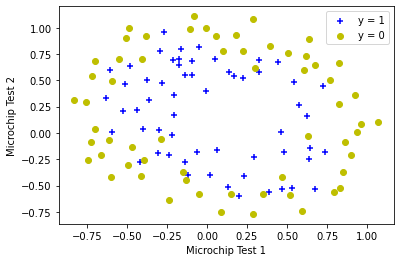

In [53]:
plot_data(X, y)

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])

## Part 1: Regularized Logistic Regression

In [54]:
# Add Polynomial Features

# Note that mapFeature also adds a column of ones for us, so the intercept term is handled
X = map_feature(X[:, 0], X[:, 1])

# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
lmd = 1

In [55]:
#  Compute and display initial cost and gradient for regularized logistic regression
cost, grad = cost_function_reg(initial_theta, X, y, lmd)

In [56]:
print('Cost at initial theta (zeros): {:0.4f}'.format(cost))
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only: \n{}'.format(grad[0:5]))
print('Expected gradients (approx) - first five values only: \n 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115')

Cost at initial theta (zeros): 0.6931
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only: 
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]
Expected gradients (approx) - first five values only: 
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


In [57]:
test_theta = np.ones(X.shape[1])

cost, grad = cost_function_reg(test_theta, X, y, 10)

In [58]:
print('Cost at test theta (with lambda = 10): {:0.2f}'.format(cost))
print('Expected cost (approx): 3.16')
print('Gradient at test theta - first five values only: \n{}'.format(grad[0:5]))
print('Expected gradients (approx) - first five values only: \n 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922')

Cost at test theta (with lambda = 10): 3.21
Expected cost (approx): 3.16
Gradient at test theta - first five values only: 
[0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]
Expected gradients (approx) - first five values only: 
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922


## Part 2: Regularization and Accuracies

In [59]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lmd = 1

In [60]:
# Optimize
def cost_func_reg(t):
    return cost_function_reg(t, X, y, lmd)[0]

def grad_func_reg(t):
    return cost_function_reg(t, X, y, lmd)[1]

In [61]:
theta, cost, *unused = opt.fmin_bfgs(f=cost_func_reg, fprime=grad_func_reg, x0=initial_theta, maxiter=400, full_output=True, disp=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'label'


Text(0, 0.5, 'Microchip Test 2')

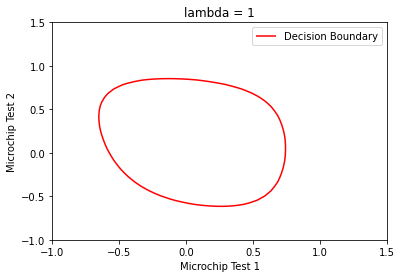

In [68]:
# Plot Boundary
plot_decision_boundary(theta, X, y)
plt.title('lambda = {}'.format(lmd))

# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

In [69]:
# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: {:0.4f}'.format(np.mean(y == p) * 100))
print('Expected accuracy (with lambda = 1): 83.1 (approx)')

Train Accuracy: 83.0508
Expected accuracy (with lambda = 1): 83.1 (approx)
